<a href="https://colab.research.google.com/github/sherry-hexichen/Churn-Analysis/blob/master/lift_gainEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install catboost --no-cache-dir

In [0]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostClassifier, Pool

In [7]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data (1).csv


In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))

In [16]:
dataset.head()

,Unnamed: 0,id,ro_dealerid,ro_vin,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_date,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,last_service_date,cust_postal_code,cust_city,cust_state_code,retained_flag,vehicle_warranty_service_status,market_value,body_class,reliability,luxury,ronum,dealer_postal_code,distance,dealer_location_population,nearby_same_dealer,nearby_third_party
0,0,813621091C6RR6FG6ES377813,5984,1C6RR6FG6ES377813,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,2017-08-16T00:00:00.0000000,50000,85100,91,1,4,2018-08-03T00:00:00.0000000,33991,CAPE CORAL,FL,0,0,15829.33,7,58,0,83149,33912,41,79943,0,18
1,1,741557301C4RJEAGXHC707971,5984,1C4RJEAGXHC707971,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,2020-01-01T00:00:00.0000000,100000,16741,85,2,1,2018-08-09T00:00:00.0000000,34134,Bonita Springs,FL,0,1,25679.75,9,50,0,83149,33912,14,79943,0,18
2,2,444285992C4RC1GG0DR788071,5984,2C4RC1GG0DR788071,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,2016-01-01T00:00:00.0000000,100000,38798,137,4,5,2018-06-18T00:00:00.0000000,33903,N FT MYERS,FL,0,0,16081.72,6,64,0,83149,33912,27,79943,0,18
3,3,736167701C3CDFAA3FD435371,5984,1C3CDFAA3FD435371,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,2018-01-01T00:00:00.0000000,50000,28092,91,2,3,2018-08-03T00:00:00.0000000,33914,Cape coral,FL,0,0,11321.47,8,58,0,83149,33912,4,79943,0,18
4,4,119974743D4PG5FV0AT231062,5984,3D4PG5FV0AT231062,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,2014-01-14T00:00:00.0000000,50000,59394,141,5,8,2018-06-14T00:00:00.0000000,33957,SANIBEL,FL,0,0,7458.59,4,58,0,83149,33912,59,79943,0,18


In [0]:
dataset = dataset.drop(['Unnamed: 0', 'id'], axis=1)
dataset = dataset[dataset['retained_flag'] != 2]

In [18]:
dataset.columns

Index(['ro_dealerid', 'ro_vin', 'avg_ro_labor_price', 'avg_ro_parts_price',
       'avg_customerpay', 'avg_customerpay_value', 'avg_warrantypay',
       'avg_warrantypay_value', 'avg_otherpay', 'avg_otherpay_value',
       'vehicle_warranty_date', 'vehicle_warranty_mileage', 'max_ro_mileage',
       'recency', 'frequency', 'vehicle_age', 'last_service_date',
       'cust_postal_code', 'cust_city', 'cust_state_code', 'retained_flag',
       'vehicle_warranty_service_status', 'market_value', 'body_class',
       'reliability', 'luxury', 'ronum', 'dealer_postal_code', 'distance',
       'dealer_location_population', 'nearby_same_dealer',
       'nearby_third_party'],
      dtype='object')

In [0]:
numVar = ['avg_ro_labor_price', 'avg_ro_parts_price', 'avg_customerpay', 'avg_customerpay_value',
       'avg_warrantypay', 'avg_warrantypay_value', 'avg_otherpay',
       'avg_otherpay_value','vehicle_warranty_mileage', 'max_ro_mileage','recency',
       'frequency', 'vehicle_age','market_value','reliability','distance']
catVar = ['vehicle_warranty_service_status','body_class','luxury',
                  'ronum','dealer_location_population','nearby_same_dealer', 'nearby_third_party']

In [0]:
features = dataset[['avg_ro_labor_price', 'avg_ro_parts_price', 'avg_customerpay', 'avg_customerpay_value',
       'avg_warrantypay', 'avg_warrantypay_value', 'avg_otherpay',
       'avg_otherpay_value','vehicle_warranty_mileage', 'max_ro_mileage','recency',
       'frequency', 'vehicle_age','market_value','reliability','distance',
       'vehicle_warranty_service_status','body_class','luxury',
                  'ronum','dealer_location_population','nearby_same_dealer', 'nearby_third_party']]
target = dataset[['retained_flag']]

In [21]:
features.dtypes

avg_ro_labor_price                 float64
avg_ro_parts_price                 float64
avg_customerpay                    float64
avg_customerpay_value              float64
avg_warrantypay                    float64
avg_warrantypay_value              float64
avg_otherpay                       float64
avg_otherpay_value                 float64
vehicle_warranty_mileage             int64
max_ro_mileage                       int64
recency                              int64
frequency                            int64
vehicle_age                          int64
market_value                       float64
reliability                          int64
distance                             int64
vehicle_warranty_service_status      int64
body_class                           int64
luxury                               int64
ronum                                int64
dealer_location_population           int64
nearby_same_dealer                   int64
nearby_third_party                   int64
dtype: obje

In [0]:
features['vehicle_warranty_service_status'] = pd.Categorical(features.vehicle_warranty_service_status)
features['body_class'] = pd.Categorical(features.body_class)
features['luxury'] = pd.Categorical(features.luxury)
features['ronum'] = pd.Categorical(features.ronum)
features['dealer_location_population'] = pd.Categorical(features.dealer_location_population)
features['nearby_same_dealer'] = pd.Categorical(features.nearby_same_dealer)
features['nearby_third_party'] = pd.Categorical(features.nearby_third_party)

In [23]:
catFeatureIndex = np.array([features.columns.get_loc(var) for var in catVar if var in features])
catFeatureIndex

array([16, 17, 18, 19, 20, 21, 22])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.30, random_state=0, stratify = target)

In [0]:
model = CatBoostClassifier()

In [0]:
model.fit(X_train, Y_train, cat_features=catFeatureIndex)

In [27]:
# make the prediction using the resulting model
preds_class = model.predict(X_test)

preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

class =  [1 1 1 ... 1 0 1]
proba =  [[0.4325868  0.5674132 ]
 [0.26021876 0.73978124]
 [0.39427796 0.60572204]
 ...
 [0.30277231 0.69722769]
 [0.55173079 0.44826921]
 [0.44922101 0.55077899]]


In [0]:
from sklearn.metrics import confusion_matrix
def CreateConfusion(Y_test,Y_pred,text='initial'):

    cm = confusion_matrix(Y_test,Y_pred)
    print(cm)

    accuracy = (cm[0,0]+cm[1,1]) / cm.sum()
    specificity = cm[1,1] / (cm[1,0] + cm[1,1])
    sensitivity = cm[0,0] / (cm[0,1] + cm[0,0])

    print("The metrics for the %s Model are: \n Accuracy: %f \n Specificity: %f \n Sensitivity: %f" % (text,accuracy,specificity,sensitivity) )
    
    return cm

In [29]:
CreateConfusion(Y_test, preds_class)

[[ 7851 16465]
 [ 2328 26121]]
The metrics for the initial Model are: 
 Accuracy: 0.643836 
 Specificity: 0.918169 
 Sensitivity: 0.322874


array([[ 7851, 16465],
       [ 2328, 26121]])

In [0]:
panel = features.copy()
panel['retained_flag'] = target

In [0]:
panel_proba = model.predict_proba(features)

In [0]:
panel_pred_class = model.predict(features)

In [0]:
panel_pred_class = list(panel_pred_class)

In [0]:
pred_loss_prob = []
for p in range(len(panel_proba)):
  pred_loss_prob.append(panel_proba[p][0])

In [0]:
panel['predLossProb'] = pred_loss_prob
panel['predClass'] = panel_pred_class

In [43]:
panel.head()

,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,market_value,reliability,distance,vehicle_warranty_service_status,body_class,luxury,ronum,dealer_location_population,nearby_same_dealer,nearby_third_party,retained_flag,predLossProb,predClass
0,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,50000,85100,91,1,4,15829.33,58,41,0,7,0,83149,79943,0,18,0,0.833619,0
1,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,100000,16741,85,2,1,25679.75,50,14,1,9,0,83149,79943,0,18,0,0.451897,1
2,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,100000,38798,137,4,5,16081.72,64,27,0,6,0,83149,79943,0,18,0,0.545732,0
3,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,50000,28092,91,2,3,11321.47,58,4,0,8,0,83149,79943,0,18,0,0.870507,0
4,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,50000,59394,141,5,8,7458.59,58,59,0,4,0,83149,79943,0,18,0,0.607869,0


In [0]:
sortPanel = panel.sort_values("predLossProb", ascending = False)

In [45]:
decilePanel = panel.copy()
decilePanel['decile'] = pd.qcut(decilePanel['predLossProb'], 10, labels=False)
decilePanel.head()

,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,market_value,reliability,distance,vehicle_warranty_service_status,body_class,luxury,ronum,dealer_location_population,nearby_same_dealer,nearby_third_party,retained_flag,predLossProb,predClass,decile
0,1621.81,529.75,0.290,647.5062,0.7100,1585.2738,0.0,0.0,50000,85100,91,1,4,15829.33,58,41,0,7,0,83149,79943,0,18,0,0.833619,0,9
1,20.19,22.50,0.500,31.6000,0.5000,11.5150,0.0,0.0,100000,16741,85,2,1,25679.75,50,14,1,9,0,83149,79943,0,18,0,0.451897,1,7
2,73.03,208.10,0.770,351.7187,0.2325,77.2702,0.0,0.0,100000,38798,137,4,5,16081.72,64,27,0,6,0,83149,79943,0,18,0,0.545732,0,8
3,69.10,0.00,0.250,0.0000,0.7500,112.0850,0.0,0.0,50000,28092,91,2,3,11321.47,58,4,0,8,0,83149,79943,0,18,0,0.870507,0,9
4,144.02,139.40,0.834,380.4981,0.1660,93.6399,0.0,0.0,50000,59394,141,5,8,7458.59,58,59,0,4,0,83149,79943,0,18,0,0.607869,0,8


In [0]:
calculate = pd.DataFrame()

In [0]:
minProb = list(decilePanel.groupby(['decile'])['predLossProb'].min())

In [0]:
calculate['minProb'] = minProb

In [0]:
maxProb = list(decilePanel.groupby(['decile'])['predLossProb'].max())
calculate['maxProb'] = maxProb

In [0]:
numOfCust = list(decilePanel.groupby(['decile']).size())
calculate['numOfCustomer'] = numOfCust

In [54]:
calculate

,minProb,maxProb,numOfCustomer
0,0.011831,0.309576,17591
1,0.309578,0.335639,17588
2,0.335641,0.381902,17587
3,0.381907,0.399118,17587
4,0.399118,0.412899,17588
5,0.412903,0.434612,17588
6,0.434616,0.450827,17588
7,0.450829,0.482859,17591
8,0.482874,0.783805,17585
9,0.783813,0.999142,17588


In [55]:
calculate = calculate.sort_values(['minProb','maxProb'], ascending=False)
calculate = calculate.reset_index(drop=True)
calculate

,minProb,maxProb,numOfCustomer
0,0.783813,0.999142,17588
1,0.482874,0.783805,17585
2,0.450829,0.482859,17591
3,0.434616,0.450827,17588
4,0.412903,0.434612,17588
5,0.399118,0.412899,17588
6,0.381907,0.399118,17587
7,0.335641,0.381902,17587
8,0.309578,0.335639,17588
9,0.011831,0.309576,17591


In [0]:
calculate['cumNumOfCustomer'] = calculate['numOfCustomer'].cumsum(axis = 0) 

In [0]:
total = decilePanel.groupby(['decile']).size()

In [58]:
retainStatus = decilePanel.groupby(['decile'])['retained_flag'].value_counts()
retainStatus

decile  retained_flag
0       1                13357
        0                 4234
1       1                11988
        0                 5600
2       1                11468
        0                 6119
3       1                10860
        0                 6727
4       1                10386
        0                 7202
5       1                10176
        0                 7412
6       1                 9770
        0                 7818
7       1                 9438
        0                 8153
8       0                11272
        1                 6313
9       0                16514
        1                 1074
Name: retained_flag, dtype: int64

In [0]:
trueLoss = []
for i in range(9, -1, -1):
  trueLoss.append(retainStatus[i][0])

In [0]:
calculate['trueLoss'] = trueLoss

In [0]:
calculate['trueLossRate'] = calculate['trueLoss'] / calculate['numOfCustomer']

In [0]:
calculate['cumTrueLoss'] = calculate['trueLoss'].cumsum(axis =0)
calculate['cumTrueLossRate'] = calculate['trueLossRate'].cumsum(axis = 0) 

In [64]:
decilePanel['predLossProb'].mean()

0.46149869662976506

In [0]:
avgLossRate = 81051/175881

In [0]:
predLossRate = list(decilePanel.groupby(['decile'])['predLossProb'].mean())
predLossRate.reverse()

In [69]:
calculate['predLossRate'] = predLossRate
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,trueLoss,trueLossRate,cumTrueLoss,cumTrueLossRate,predLossRate
0,0.783813,0.999142,17588,17588,16514,0.938936,16514,0.938936,0.907099
1,0.482874,0.783805,17585,35173,11272,0.641001,27786,1.579936,0.632433
2,0.450829,0.482859,17591,52764,8153,0.463476,35939,2.043412,0.459850
3,0.434616,0.450827,17588,70352,7818,0.444508,43757,2.487920,0.444377
4,0.412903,0.434612,17588,87940,7412,0.421424,51169,2.909343,0.422658
5,0.399118,0.412899,17588,105528,7202,0.409484,58371,3.318827,0.405923
6,0.381907,0.399118,17587,123115,6727,0.382498,65098,3.701326,0.391455
7,0.335641,0.381902,17587,140702,6119,0.347927,71217,4.049253,0.364833
8,0.309578,0.335639,17588,158290,5600,0.318399,76817,4.367652,0.321224
9,0.011831,0.309576,17591,175881,4234,0.240691,81051,4.608343,0.265188


In [0]:
# calculate the LIFT values
calculate['actualLift'] = calculate['trueLossRate'] / avgLossRate
calculate['predictLift'] = calculate['predLossRate'] / avgLossRate

In [72]:
calculate['decile'] = [1,2,3,4,5,6,7,8,9,10]
calculate

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,trueLoss,trueLossRate,cumTrueLoss,cumTrueLossRate,predLossRate,actualLift,predictLift,decile
0,0.783813,0.999142,17588,17588,16514,0.938936,16514,0.938936,0.907099,2.037494,1.968409,1
1,0.482874,0.783805,17585,35173,11272,0.641001,27786,1.579936,0.632433,1.390974,1.372383,2
2,0.450829,0.482859,17591,52764,8153,0.463476,35939,2.043412,0.459850,1.005744,0.997876,3
3,0.434616,0.450827,17588,70352,7818,0.444508,43757,2.487920,0.444377,0.964583,0.964301,4
4,0.412903,0.434612,17588,87940,7412,0.421424,51169,2.909343,0.422658,0.914491,0.917169,5
5,0.399118,0.412899,17588,105528,7202,0.409484,58371,3.318827,0.405923,0.888581,0.880855,6
6,0.381907,0.399118,17587,123115,6727,0.382498,65098,3.701326,0.391455,0.830023,0.849459,7
7,0.335641,0.381902,17587,140702,6119,0.347927,71217,4.049253,0.364833,0.755004,0.791690,8
8,0.309578,0.335639,17588,158290,5600,0.318399,76817,4.367652,0.321224,0.690927,0.697057,9
9,0.011831,0.309576,17591,175881,4234,0.240691,81051,4.608343,0.265188,0.522301,0.575458,10


In [0]:
calculate2 = calculate.copy()

In [0]:
calculate2['LossWithoutModel'] = calculate2['numOfCustomer'] * avgLossRate

In [0]:
calculate2['cumLossWithoutModel'] = calculate2['LossWithoutModel'].cumsum(axis =0)

In [0]:
calculate2['cumLift'] = calculate2['cumTrueLoss'] / calculate2['cumLossWithoutModel']

In [78]:
calculate2

,minProb,maxProb,numOfCustomer,cumNumOfCustomer,trueLoss,trueLossRate,cumTrueLoss,cumTrueLossRate,predLossRate,actualLift,predictLift,decile,LossWithoutModel,cumLossWithoutModel,cumLift
0,0.783813,0.999142,17588,17588,16514,0.938936,16514,0.938936,0.907099,2.037494,1.968409,1,8105.053917,8105.053917,2.037494
1,0.482874,0.783805,17585,35173,11272,0.641001,27786,1.579936,0.632433,1.390974,1.372383,2,8103.671431,16208.725348,1.714262
2,0.450829,0.482859,17591,52764,8153,0.463476,35939,2.043412,0.459850,1.005744,0.997876,3,8106.436403,24315.161751,1.478049
3,0.434616,0.450827,17588,70352,7818,0.444508,43757,2.487920,0.444377,0.964583,0.964301,4,8105.053917,32420.215669,1.349683
4,0.412903,0.434612,17588,87940,7412,0.421424,51169,2.909343,0.422658,0.914491,0.917169,5,8105.053917,40525.269586,1.262644
5,0.399118,0.412899,17588,105528,7202,0.409484,58371,3.318827,0.405923,0.888581,0.880855,6,8105.053917,48630.323503,1.200300
6,0.381907,0.399118,17587,123115,6727,0.382498,65098,3.701326,0.391455,0.830023,0.849459,7,8104.593089,56734.916591,1.147406
7,0.335641,0.381902,17587,140702,6119,0.347927,71217,4.049253,0.364833,0.755004,0.791690,8,8104.593089,64839.509680,1.098358
8,0.309578,0.335639,17588,158290,5600,0.318399,76817,4.367652,0.321224,0.690927,0.697057,9,8105.053917,72944.563597,1.053087
9,0.011831,0.309576,17591,175881,4234,0.240691,81051,4.608343,0.265188,0.522301,0.575458,10,8106.436403,81051.000000,1.000000


Suppose the top 2 deciles are considered to be the risky groups, we want to investigate the expected benefit and cost using the model. Since the company has NO DATA that can provide information about the cost of marketing campaign, all the analysis were conducted based on assumptions. Nevertheless, the idea of using lift chart incorporating costs and benefits is reasonable and could be able to applied when more accurate data is available.

In [97]:
risky = decilePanel[ (decilePanel['decile'] == 9) | (decilePanel['decile'] == 8)].copy()
risky

,avg_ro_labor_price,avg_ro_parts_price,avg_customerpay,avg_customerpay_value,avg_warrantypay,avg_warrantypay_value,avg_otherpay,avg_otherpay_value,vehicle_warranty_mileage,max_ro_mileage,recency,frequency,vehicle_age,market_value,reliability,distance,vehicle_warranty_service_status,body_class,luxury,ronum,dealer_location_population,nearby_same_dealer,nearby_third_party,retained_flag,predLossProb,predClass,decile
0,1621.81,529.75,0.290000,647.506200,0.7100,1585.2738,0.000000,0.000000,50000,85100,91,1,4,15829.330000,58,41,0,7,0,83149,79943,0,18,0,0.833619,0,9
2,73.03,208.10,0.770000,351.718700,0.2325,77.2702,0.000000,0.000000,100000,38798,137,4,5,16081.720000,64,27,0,6,0,83149,79943,0,18,0,0.545732,0,8
3,69.10,0.00,0.250000,0.000000,0.7500,112.0850,0.000000,0.000000,50000,28092,91,2,3,11321.470000,58,4,0,8,0,83149,79943,0,18,0,0.870507,0,9
4,144.02,139.40,0.834000,380.498100,0.1660,93.6399,0.000000,0.000000,50000,59394,141,5,8,7458.590000,58,59,0,4,0,83149,79943,0,18,0,0.607869,0,8
5,17.36,44.30,1.000000,68.805000,0.0000,0.0000,0.000000,0.000000,50000,41390,300,2,3,22857.320000,58,71,0,7,0,83149,79943,0,18,0,0.806046,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191483,189.53,568.19,1.000000,811.780000,0.0000,0.0000,0.000000,0.000000,36000,199603,99,1,14,12333.323193,73,200,0,8,0,145615,892062,5,19,0,0.850397,0,9
191484,3.60,70.67,0.833333,72.853333,0.0000,0.0000,0.166667,8.416667,36000,221125,277,3,18,12333.323193,73,64,0,11,0,145615,892062,5,19,0,0.580269,0,8
191485,508.70,23.96,1.000000,598.840000,0.0000,0.0000,0.000000,0.000000,36000,380123,108,1,17,12333.323193,73,180,0,7,0,145615,892062,5,19,1,0.904629,0,9
191486,105.16,78.99,0.500000,145.032500,0.2500,324.5275,0.250000,0.000000,36000,136600,219,4,12,12333.323193,73,167,0,7,0,145615,892062,5,19,0,0.692465,0,8


In [98]:
risky = risky[['retained_flag','predLossProb', 'predClass']]
risky = risky.sort_values("predLossProb", ascending = False)
risky = risky.reset_index(inplace=False)
risky = risky.drop(['index'], axis=1)
risky

,retained_flag,predLossProb,predClass
0,0,0.999142,0
1,0,0.998970,0
2,0,0.998333,0
3,0,0.998316,0
4,0,0.998307,0
...,...,...,...
35168,1,0.482880,1
35169,1,0.482880,1
35170,0,0.482880,1
35171,0,0.482880,1


In [0]:
risky['cumNumOfCustomer'] = list(range(1, risky.shape[0] + 1 ))

In [100]:
risky

,retained_flag,predLossProb,predClass,cumNumOfCustomer
0,0,0.999142,0,1
1,0,0.998970,0,2
2,0,0.998333,0,3
3,0,0.998316,0,4
4,0,0.998307,0,5
...,...,...,...,...
35168,1,0.482880,1,35169
35169,1,0.482880,1,35170
35170,0,0.482880,1,35171
35171,0,0.482880,1,35172


In [0]:
Churn = []
for i in range(0, len(risky['retained_flag'])):
  if risky['retained_flag'].iloc[i] == 0:
    Churn.append(1)
  else:
    Churn.append(0)

In [102]:
risky['churnIndicator'] = Churn
risky['cumChurn'] = risky['churnIndicator'].cumsum(axis =0)
risky

,retained_flag,predLossProb,predClass,cumNumOfCustomer,churnIndicator,cumChurn
0,0,0.999142,0,1,1,1
1,0,0.998970,0,2,1,2
2,0,0.998333,0,3,1,3
3,0,0.998316,0,4,1,4
4,0,0.998307,0,5,1,5
...,...,...,...,...,...,...
35168,1,0.482880,1,35169,0,27784
35169,1,0.482880,1,35170,0,27784
35170,0,0.482880,1,35171,1,27785
35171,0,0.482880,1,35172,1,27786


In [103]:
risky['propOfCustomer'] = risky['cumNumOfCustomer'] / 35176
risky['propOfChurnCaptured'] = risky['cumChurn'] / 27836
risky['lift'] = risky['propOfChurnCaptured'] / risky['propOfCustomer']
risky

,retained_flag,predLossProb,predClass,cumNumOfCustomer,churnIndicator,cumChurn,propOfCustomer,propOfChurnCaptured,lift
0,0,0.999142,0,1,1,1,0.000028,0.000036,1.263687
1,0,0.998970,0,2,1,2,0.000057,0.000072,1.263687
2,0,0.998333,0,3,1,3,0.000085,0.000108,1.263687
3,0,0.998316,0,4,1,4,0.000114,0.000144,1.263687
4,0,0.998307,0,5,1,5,0.000142,0.000180,1.263687
...,...,...,...,...,...,...,...,...,...
35168,1,0.482880,1,35169,0,27784,0.999801,0.998132,0.998331
35169,1,0.482880,1,35170,0,27784,0.999829,0.998132,0.998302
35170,0,0.482880,1,35171,1,27785,0.999858,0.998168,0.998310
35171,0,0.482880,1,35172,1,27786,0.999886,0.998204,0.998317


In [104]:
risky['retained_flag'].value_counts()

0    27786
1     7387
Name: retained_flag, dtype: int64

In [105]:
risky['predClass'].value_counts()

0    33642
1     1531
Name: predClass, dtype: int64

In [106]:
avgBenefit = (decilePanel['avg_ro_labor_price'] + decilePanel['avg_ro_parts_price']).mean()
avgBenefit

190.85579380378846

We conduct a mock-up analysis based on comparison between the predictive label from our model and the actual label from the database. All customers are ranked from the highest lost probability to the lowest, and customers that are labeled as lost by the model will be giving out discount. If the model predicts a customer will be lost, and the actual label shows that he actually is lost in the next year, then giving out this customer discount will generate positive revenue. If the model predicts a customer will be lost, but the actual label shows that he actually is retained in the next year, then giving out this customer discount will waste money. Revenue from each customer is 190 dollars, which is based on customer average spending. And the graph shows the profit after 35% discount to each customer. So, we can see that after around 30k customers, the profit is going down, and the corresponding lost probability for this point is 56%, which means that dealers will generate positive profit if they give discounts to customers with a lost probability higher than 56%. If a customer’s lost probability is lower than 56%, this customer does not worth to give out the discount.

In [107]:
discount = 0.35
avgCost = avgBenefit*discount
avgCost

66.79952783132596

In [0]:
avgProfit = avgBenefit - avgCost

In [0]:
money = []
for i in range(0, len(risky['retained_flag'])):
  if risky['retained_flag'].iloc[i] == 0 and risky['predClass'].iloc[i] == 0:
    money.append(avgProfit*(1-risky['predLossProb'].iloc[i]))
  elif risky['retained_flag'].iloc[i] == 1 and risky['predClass'].iloc[i] == 0:
    money.append(-avgCost)
  elif risky['retained_flag'].iloc[i] == 0 and risky['predClass'].iloc[i] == 1:
    money.append(-avgBenefit*risky['predLossProb'].iloc[i])
  else:
    money.append(0)

In [0]:
risky['profit/loss'] = money
risky['netProfit/netLoss'] = risky['profit/loss'].cumsum(axis=0)

In [111]:
cutoff = risky.loc[risky['netProfit/netLoss'].idxmax()]
cutoff

retained_flag               0.000000
predLossProb                0.558455
predClass                   0.000000
cumNumOfCustomer        30746.000000
churnIndicator              1.000000
cumChurn                25598.000000
propOfCustomer              0.874062
propOfChurnCaptured         0.919601
lift                        1.052100
profit/loss                54.776473
netProfit/netLoss      201239.922830
Name: 30745, dtype: float64

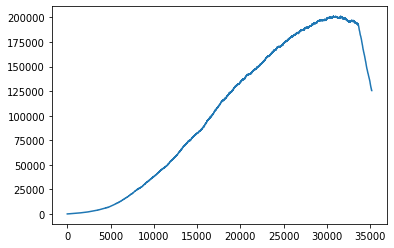

In [112]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(risky['cumNumOfCustomer'], risky['netProfit/netLoss'])

Draft plot. More visualization will be generated using Power BI.

In [0]:
from google.colab import files
risky.to_csv('riskyForPlot.csv') 
files.download('riskyForPlot.csv')